# **1. Menyiapkan Dataset yang Dibutuhkan**

In [1]:
# Import library yang dibutuhkan

# Untuk membuat model deep learning
import tensorflow as tf
from tensorflow import keras
# Untuk mengakses model pre-trained
import tensorflow_hub as hub
# Untuk memisahkan dataset train dan test
from sklearn.model_selection import train_test_split

# Untuk visualisasi
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

In [2]:
# Menentukan dataset yang digunakan

dataset_dir = 'C:\\Users\\asus7\\Documents\\Damara Salsabila\\Semester 8\\Skripsi\\Rice_Image_Dataset'

dataset_dir = pathlib.Path(dataset_dir)
dataset_dir

WindowsPath('C:/Users/asus7/Documents/Damara Salsabila/Semester 8/Skripsi/Rice_Image_Dataset')

In [3]:
# Membuat variable dengan nama jenis beras (kelas) dan membuat daftar gambar menjadi 800 gambar di tiap kelasnya

arborio = list(dataset_dir.glob('Arborio/*'))[:800]
basmati = list(dataset_dir.glob('Basmati/*'))[:800]
ipsala = list(dataset_dir.glob('Ipsala/*'))[:800]
jasmine = list(dataset_dir.glob('Jasmine/*'))[:800]
karacadag = list(dataset_dir.glob('Karacadag/*'))[:800]

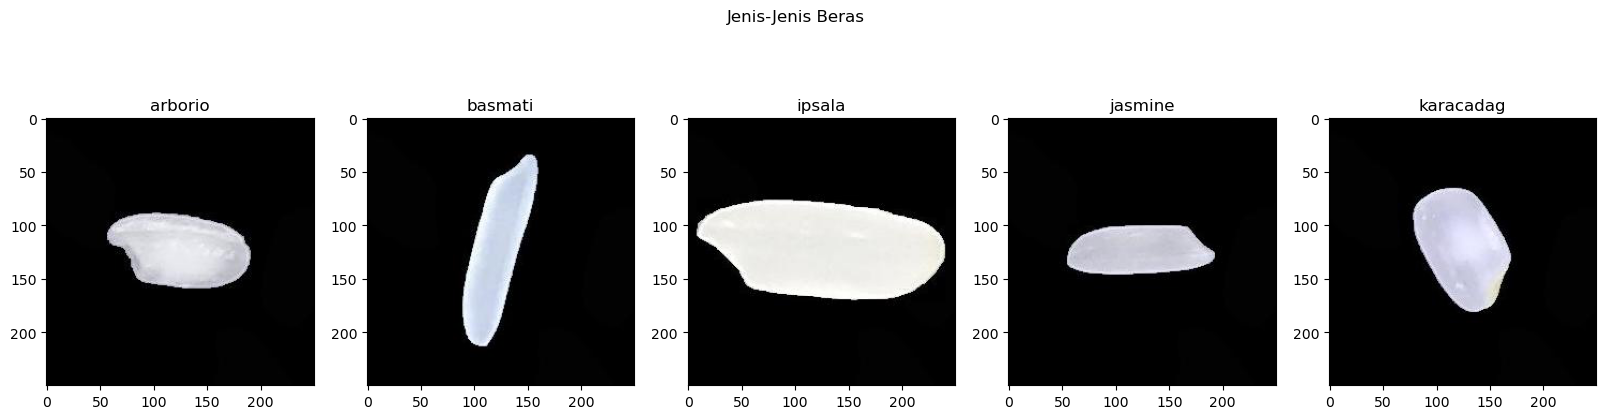

In [4]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5)) # Membuat subplot untuk gambar yang dibaca
fig.suptitle('Jenis-Jenis Beras')

# Membuat variable dan mengambil gambar pertama di tiap kelasnya
gambar_arborio = img.imread(arborio[0])
gambar_basmati = img.imread(basmati[0])
gambar_ipsala = img.imread(ipsala[0])
gambar_jasmine = img.imread(jasmine[0])
gambar_karacadag = img.imread(karacadag[0])

# Memberi judul pada semua subplot
ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

# Menampilkan gambar
ax[0].imshow(gambar_arborio)
ax[1].imshow(gambar_basmati)
ax[2].imshow(gambar_ipsala)
ax[3].imshow(gambar_jasmine)
ax[4].imshow(gambar_karacadag)

In [5]:
# Image path untuk tiap kelas
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

# Label angka untuk tiap kelas
df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [6]:
img = cv2.imread(str(df_images['arborio'][0])) # Convert gambar arborio ke array
img.shape # Mengembalikan bentuk gambar

(250, 250, 3)

In [7]:
# Proses loop untuk mengubah ukuran gambar dan menyimpan path gambar & label untuk sesi training

X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # MobileNetv2
        X.append(resized_img)
        y.append(df_labels[label])

In [8]:
# Konversi X dan y ke dalam format numpy array

X = np.array(X)
y = np.array(y)

In [9]:
# Memisahkan data ke dalam sesi training, sesi validasi, dan sesi testing

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.25, random_state=32)

# Mencetak jumlah data di setiap sesi

print(f'Jumlah data training: {len(X_train)}')
print(f'Jumlah data validasi: {len(X_val)}')
print(f'Jumlah data testing: {len(X_test)}')

Jumlah data training: 3200
Jumlah data validasi: 600
Jumlah data testing: 200


In [10]:
# Normalisasi data

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
# # Augmentasi data untuk sesi training menggunakan ImageDataGenerator

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(
#     rotation_range=20,        # Rentang rotasi gambar
#     width_shift_range=0.2,    # Jarak pergeseran horizontal
#     height_shift_range=0.2,   # Jarak pergeseran vertikal
#     shear_range=0.2,          # Intensitas pemotongan
#     zoom_range=0.2,           # Rentang zoom
#     horizontal_flip=True,     # Memutar gambar secara horizontal
#     fill_mode='nearest'       # Cara mengisi piksel yang kosong
# )

# # Tidak perlu augmentasi data untuk sesi validasi dan testing

# val_test_datagen = ImageDataGenerator()

# **2. Membuat Model**

In [11]:
import shutil

model_cache_dir = 'C:\\Users\\asus7\\AppData\\Local\\Temp\\tfhub_modules\\426589ad685896ab7954855255a52db3442cb38d'
shutil.rmtree(model_cache_dir)

In [12]:
# Menggunakan MobileNetv2 untuk lapisan Keras

mobile_net_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
mobile_net = hub.KerasLayer(
        mobile_net_url, input_shape=(224,224, 3), trainable=False)

In [13]:
# Mendefinisikan model Neural Network menggunakan Keras

num_label = 5 # Jumlah label

model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.Dense(num_label)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 3,545,275
Trainable params: 5,010
Non-trainable params: 3,540,265
_________________________________________________________________


# **3. Sesi Training**

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  optimizer=optimizer,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

# Augmentasi data pada sesi training dan lakukan fit model

# train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
# val_generator = val_test_datagen.flow(X_val, y_val, batch_size=32)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
100/100 [==============================] - 74s 590ms/step - loss: 0.3098 - acc: 0.9016 - val_loss: 0.0779 - val_acc: 0.9800
Epoch 2/10
100/100 [==============================] - 50s 500ms/step - loss: 0.0721 - acc: 0.9812 - val_loss: 0.0609 - val_acc: 0.9817
Epoch 3/10
100/100 [==============================] - 49s 495ms/step - loss: 0.0546 - acc: 0.9875 - val_loss: 0.0423 - val_acc: 0.9883
Epoch 4/10
100/100 [==============================] - 50s 498ms/step - loss: 0.0434 - acc: 0.9909 - val_loss: 0.0361 - val_acc: 0.9933
Epoch 5/10
100/100 [==============================] - 51s 513ms/step - loss: 0.0366 - acc: 0.9919 - val_loss: 0.0383 - val_acc: 0.9917
Epoch 6/10
100/100 [==============================] - 49s 492ms/step - loss: 0.0317 - acc: 0.9941 - val_loss: 0.0297 - val_acc: 0.9917
Epoch 7/10
100/100 [==============================] - 52s 517ms/step - loss: 0.0281 - acc: 0.9941 - val_loss: 0.0362 - val_acc: 0.9900
Epoch 8/10
100/100 [==============================] - 5

# **4. Sesi Evaluasi**

In [15]:
# Mengevaluasi model

model.evaluate(X_test,y_test)

7/7 [==============================] - 3s 388ms/step - loss: 0.0221 - acc: 0.9900


[0.022063545882701874, 0.9900000095367432]

4/4 [==============================] - 5s 454ms/step
Class 0: TP = 32, FP = 1, FN = 1, TN = 166
Class 1: TP = 35, FP = 0, FN = 0, TN = 165
Class 2: TP = 52, FP = 0, FN = 0, TN = 148
Class 3: TP = 46, FP = 1, FN = 0, TN = 153
Class 4: TP = 33, FP = 0, FN = 1, TN = 166
Confusion Matrix:
[[32  0  0  1  0]
 [ 0 35  0  0  0]
 [ 0  0 52  0  0]
 [ 0  0  0 46  0]
 [ 1  0  0  0 33]]


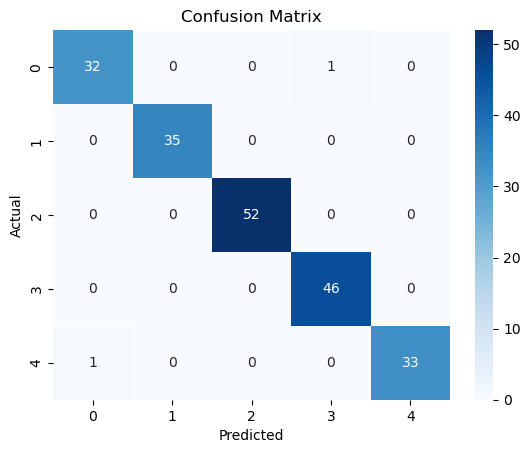

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        52
           3       0.98      1.00      0.99        46
           4       1.00      0.97      0.99        34

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [18]:
# Mencetak laporan hasil klasifikasi
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Mencetak TP, FP, dan FN untuk setiap kelas
num_classes = len(cm)  # Jumlah kelas
for i in range(num_classes):
    TP = cm[i, i]  # True Positives untuk kelas i
    FP = cm[:, i].sum() - TP  # False Positives untuk kelas i
    FN = cm[i, :].sum() - TP  # False Negatives untuk kelas i
    TN = cm.sum() - (TP + FP + FN)  # True Negatives untuk kelas i
    print(f'Class {i}: TP = {TP}, FP = {FP}, FN = {FN}, TN = {TN}')

# Mencetak confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualisasi confusion matrix dengan heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Mencetak laporan hasil klasifikasi
print(classification_report(y_test, y_pred_bool))

# **5. Visualisasi Model**

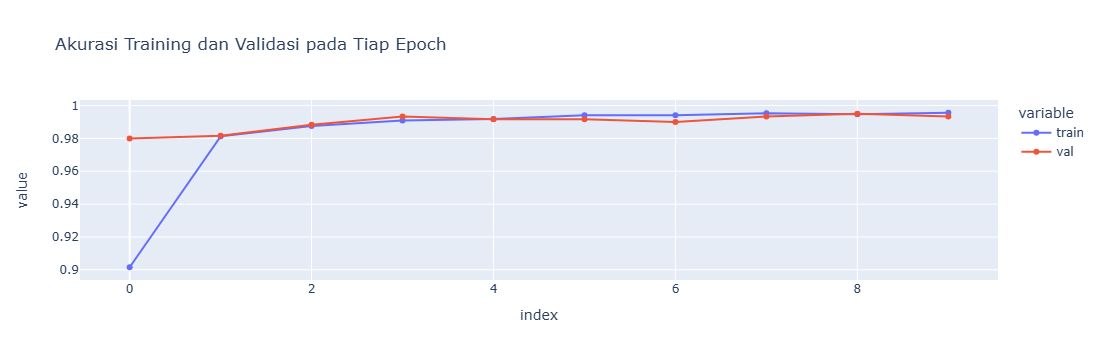

In [19]:
# Visualisasi akurasi training dan valuasi model

from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import pandas as pd

init_notebook_mode(connected=True)

acc = pd.DataFrame({'train': history.history['acc'], 'val': history.history['val_acc']})

fig = px.line(acc, x=acc.index, y=acc.columns[0::], title='Akurasi Training dan Validasi pada Tiap Epoch', markers=True)
fig.show()

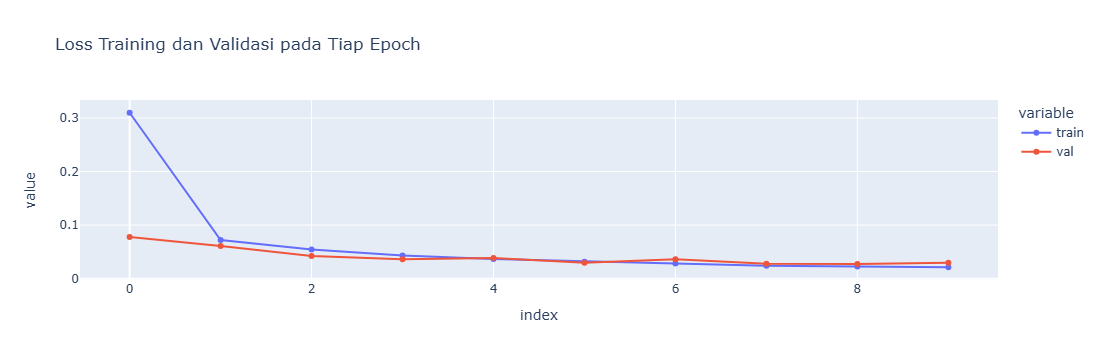

In [20]:
# Visualisasi loss training dan valuasi model

loss = pd.DataFrame({'train': history.history['loss'], 'val': history.history['val_loss']})

fig = px.line(loss, x=loss.index, y=loss.columns[0::], title='Loss Training dan Validasi pada Tiap Epoch', markers=True)
fig.show()

# **6. Sesi Testing**

1/1 [==============================] - 0s 90ms/step


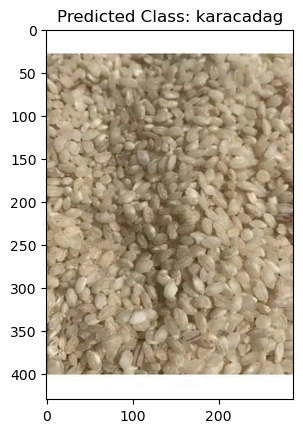

In [95]:
# Path gambar yang akan diuji
image_path = 'C:\\Users\\asus7\\Documents\\Damara Salsabila\\Semester 8\\Skripsi\\Gambar Test\\karacadag2.jpg'

# Fungsi untuk membaca dan memproses gambar
def preprocess_image(image_path):
    # Baca gambar menggunakan OpenCV
    image = cv2.imread(image_path)
    # Ubah ukuran gambar menjadi (224, 224), karena MobileNetv2 membutuhkan gambar berukuran 224x224
    image = cv2.resize(image, (224, 224))
    # Normalisasi gambar (pembagian nilai pixel dengan 255)
    image = image / 255.0
    # Ubah dimensi gambar menjadi (1, 224, 224, 3) karena model mengharapkan batch input
    image = np.expand_dims(image, axis=0)
    return image

# Fungsi untuk memprediksi kelas gambar menggunakan model
def predict_image_class(image, model):
    # Lakukan prediksi dengan model
    predictions = model.predict(image)
    # Ambil indeks kelas dengan probabilitas tertinggi
    predicted_class_index = np.argmax(predictions)
    return predicted_class_index

# Fungsi untuk menampilkan gambar dan prediksi
def display_image_with_prediction(image_path, predicted_class_label):
    # Baca gambar menggunakan OpenCV
    image = cv2.imread(image_path)
    # Ubah warna BGR menjadi RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Tampilkan gambar menggunakan Matplotlib
    plt.imshow(image)
    plt.title("Predicted Class: " + predicted_class_label)

# Praproses gambar
processed_image = preprocess_image(image_path)

# Lakukan prediksi menggunakan model
predicted_class_index = predict_image_class(processed_image, model)

# Interpretasikan hasil prediksi
class_labels = ['arborio', 'basmati', 'ipsala', 'jasmine', 'karacadag']
predicted_class_label = class_labels[predicted_class_index]

# Tampilkan gambar dengan prediksi
display_image_with_prediction(image_path, predicted_class_label)

### **7. Save Model**

In [ ]:
# Simpan model
model.save('klasifikasi_Beras32')